**Homework 5 main file**

**Necessary Imports**

In [1]:
import pandas as pd
import numpy as np
import ijson
import networkx as nx
import os
from tqdm import tqdm
from itertools import combinations
import ast
import matplotlib.pyplot as plt
import random
import seaborn as sns


# **1. Data**


Paths

In [2]:
papers_path = r"C:\Users\Elias Antoun\Desktop\Data Science Sapienza\Semester 1\ADM\Assignments\Antoun_ADM_HW5\dblp.v12.json"

Steps taken to load the massive dataset

In [3]:
# Function to return a dataframe out of every chunk of data
def process_chunk(chunk):
    return pd.DataFrame(chunk)

# After (a lot of) trial and error, chunk size = 1000 was the best option
def chunk_generator(file_path, chunk_size=1000):
    """Generator function that yields chunks of data."""
    with open(file_path, 'rb') as file:
        objects = ijson.items(file, 'item')
        chunk = []
        for obj in objects:
            chunk.append(obj)
            if len(chunk) >= chunk_size:
                yield chunk
                chunk = []
        if chunk:
            yield chunk

# Process the file from the specified path in chunks, and save intermediate results to recover progress in case of crash
def process_file(file_path, chunk_size=1000, save_interval=10):
    chunks = chunk_generator(file_path, chunk_size)
    pbar = tqdm(desc="Processing chunks", unit="chunk")

    # empty df to store data
    processed_data = pd.DataFrame()

    for i, chunk in enumerate(chunks):
        df_chunk = process_chunk(chunk)
        processed_data = pd.concat([processed_data, df_chunk], ignore_index=True)
        pbar.update(1)

        # Save intermediate results every 10 chunks
        if (i + 1) % save_interval == 0:
            processed_data.to_csv(f'intermediate_result_{i + 1}.csv', index=False)
            processed_data = pd.DataFrame()  # Reset to free up memory

    pbar.close()
    return processed_data

final_data = process_file(papers_path)


Processing chunks: 4895chunk [17:14,  4.73chunk/s]


Join all the intermediate csv files together to generate a new complete dataframe, and save it as csv for easier access.

In [5]:
intermediate_files = [f for f in os.listdir() if f.startswith('intermediate_result_')]

papers_df = pd.concat([pd.read_csv(f) for f in intermediate_files], ignore_index=True)

# Save the combined data to a new file
papers_df.to_csv('final_combined_data.csv', index=False)


_In case of kernel restart, run imports block and below this line only_

In [3]:
papers_df = pd.read_csv('final_combined_data.csv')

C:\Users\Elias Antoun\AppData\Local\Temp\ipykernel_22556\3251129193.py:1: DtypeWarning: Columns (5,6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  papers_df = pd.read_csv('final_combined_data.csv')


In [4]:
papers_df.head(10)

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue,alias_ids
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013,1,89.0,93.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-39476-8_19,"[2005687710, 2018037215]","{'IndexLength': 58, 'InvertedIndex': {'tool.':...","[{'name': 'Telecommunications network', 'w': D...",{'raw': 'International Conference on Human-Com...,NaN
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000,1,NaN,NaN,Journal,NaN,56.0,NaN,NaN,NaN,NaN,"[{'name': 'Graph', 'w': Decimal('0.0')}, {'nam...","{'raw': 'Ars Combinatoria', 'id': 73158690, 't...",NaN
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011,1,137.0,144.0,Conference,Eurographics Association,NaN,NaN,10.2312/VAST/VAST11/137-144,"[1535888970, 1992876689, 1993710814, 203565334...","{'IndexLength': 201, 'InvertedIndex': {'illust...","[{'name': 'Statue', 'w': Decimal('0.40216')}, ...",{'raw': 'International Conference on Virtual R...,NaN
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009,6,597.0,602.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-11164-8_97,"[1560724230, 1986968751, 2156909104]","{'IndexLength': 64, 'InvertedIndex': {'standar...",[{'name': 'Autoregressive–moving-average model...,{'raw': 'Pattern Recognition and Machine Intel...,NaN
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,99.0,102.0,Conference,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer vision', 'w': Decimal('0.4...",{'raw': 'International Conference on Computer ...,NaN
5,5781,"[{'name': 'Jovan Dj. Golic', 'id': 1237859792}...",Vectorial fast correlation attacks.,2004,2,247.0,NaN,Repository,NaN,2004.0,NaN,NaN,NaN,NaN,"[{'name': 'Pattern recognition', 'w': Decimal(...","{'raw': 'IACR Cryptology ePrint Archive', 'id'...",NaN
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011,0,331.0,335.0,Conference,"Springer, London",NaN,NaN,10.1007/978-1-4471-2155-8_42,"[2007942710, 2040446335, 2042901705, 2138296484]","{'IndexLength': 89, 'InvertedIndex': {'44': [7...","[{'name': 'Peak signal-to-noise ratio', 'w': D...",{'raw': 'International Symposium on Computer a...,NaN
7,6762,"[{'name': 'Pranay Chaudhuri', 'id': 2142249029...",A Self-Stabilizing Algorithm for Finding the C...,2003,0,1460.0,1463.0,Conference,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer science', 'w': Decimal('0....",{'raw': 'Parallel and Distributed Processing T...,NaN
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012,0,498.0,508.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-28490-8_52,"[141500162, 1977736041, 2057072261, 2495388083...","{'IndexLength': 83, 'InvertedIndex': {'before'...","[{'name': 'Ubiquitous commerce', 'w': Decimal(...",{'raw': 'Asian Conference on Intelligent Infor...,NaN
9,8763,"[{'name': 'Dominik Szajerman', 'org': 'Lodz Un...",Fur Visualisation for Computer Game Engines an...,2014,0,41.0,48.0,Conference,"Springer, Cham",NaN,NaN,10.1007/978-3-319-11331-9_6,"[2002239941, 2062162286, 2114709034]","{'IndexLength': 84, 'InvertedIndex': {'fur': [...","[{'name': 'Computer graphics (images)', 'w': D...",{'raw': 'International Conference on Computer ...,NaN


In [5]:
# Preprocess and sort papers by citation count using numpy
top_papers = papers_df.nlargest(10000, 'n_citation')
#top_papers = pd.read_csv('top_10000_papers.csv')
top_papers.head(10)

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue,alias_ids
4126136,2041404167,"[{'name': 'C. E. Shannon', 'org': 'External Or...",The Mathematical Theory of Communication,1949,48327,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 89, 'InvertedIndex': {'through...","[{'name': 'Applied mathematics', 'w': Decimal(...",NaN,NaN
4050907,1639032689,"[{'name': 'David E. Goldberg', 'id': 2102678951}]","Genetic algorithms in search, optimization, an...",1989,44175,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 75, 'InvertedIndex': {'researc...","[{'name': 'Genetic operator', 'w': Decimal('0....",NaN,NaN
3462588,2912565176,"[{'name': 'Lotfi A. Zadeh', 'id': 2252586558}]",Fuzzy sets,1996,42437,394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Data mining', 'w': Decimal('0.36889...","{'raw': 'Fuzzy sets, fuzzy logic, and fuzzy sy...",NaN
2167610,2151103935,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",Distinctive Image Features from Scale-Invarian...,2004,35541,91,110,Journal,Kluwer Academic Publishers,60.0,2.0,10.1023/B:VISI.0000029664.99615.94,"[19720318, 1541642243, 1560959218, 1676552347,...","{'IndexLength': 164, 'InvertedIndex': {'distor...","[{'name': 'Scale-invariant feature transform',...",{'raw': 'International Journal of Computer Vis...,"[2184229386, 2997701940]"
3448311,2911964244,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",Random Forests,2001,34741,5,32,NaN,NaN,45.0,1.0,10.1023/A:1010933404324,"[1507255258, 1580948147, 1605688901, 197584664...","{'IndexLength': 160, 'InvertedIndex': {'but': ...","[{'name': 'AdaBoost', 'w': Decimal('0.55878')}...",{'raw': 'Machine Learning archive'},NaN
171333,1973948212,"[{'name': 'David W. Hosmer', 'org': '‡Universi...",Applied Logistic Regression,1989,32053,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 47, 'InvertedIndex': {'for': [...","[{'name': 'Binomial regression', 'w': Decimal(...",{'raw': ''},"[2017629773, 2569957239, 2795977808, 279730213..."
1901785,2153635508,"[{'name': 'Chih-Chung Chang', 'org': 'National...",LIBSVM: A library for support vector machines,2011,31047,27.0,NaN,Journal,ACM,2.0,3.0,10.1145/1961189.1961199,"[1510526001, 1543810117, 1556115774, 156879334...","{'IndexLength': 75, 'InvertedIndex': {'been': ...","[{'name': 'Graph kernel', 'w': Decimal('0.4826...",{'raw': 'ACM Transactions on Intelligent Syste...,NaN
1939388,2156909104,"[{'name': 'Vladimir N. Vapnik', 'org': 'AT&T B...",The Nature of Statistical Learning Theory,1995,28886,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 34, 'InvertedIndex': {'algorit...","[{'name': 'Statistical learning theory', 'w': ...",{'raw': ''},NaN
4558041,1791587663,"[{'name': 'Fred D. Davis', 'org': 'Computer an...","Perceived usefulness, perceived ease of use, a...",1989,25855,319.0,340.0,Journal,Society for Information Management and The Man...,13.0,3.0,10.2307/249008,"[157213131, 1520103841, 1778357938, 1972888601...","{'IndexLength': 229, 'InvertedIndex': {'practi...","[{'name': 'Expectation confirmation theory', '...",{'raw': 'Management Information Systems Quarte...,NaN
1483078,2119821739,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",Support-Vector Networks,1995,22276,273.0,297.0,Journal,Kluwer Academic Publishers,20.0,3.0,10.1023/A:1022627411411,"[2087347434, 2154579312, 2168228682]","{'IndexLength': 122, 'InvertedIndex': {'very':...","[{'name': 'Online machine learning', 'w': Deci...","{'raw': 'Machine Learning', 'id': 62148650, 't...",NaN


Some explorative visualizations

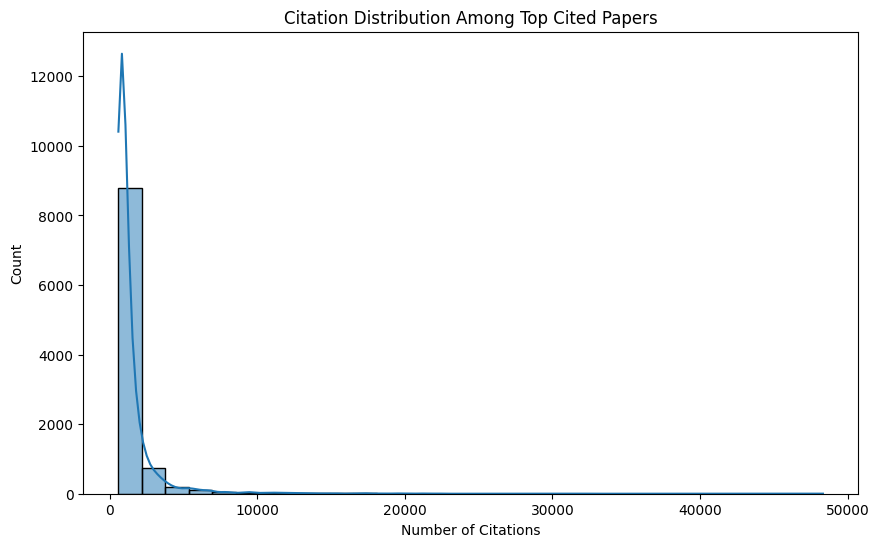

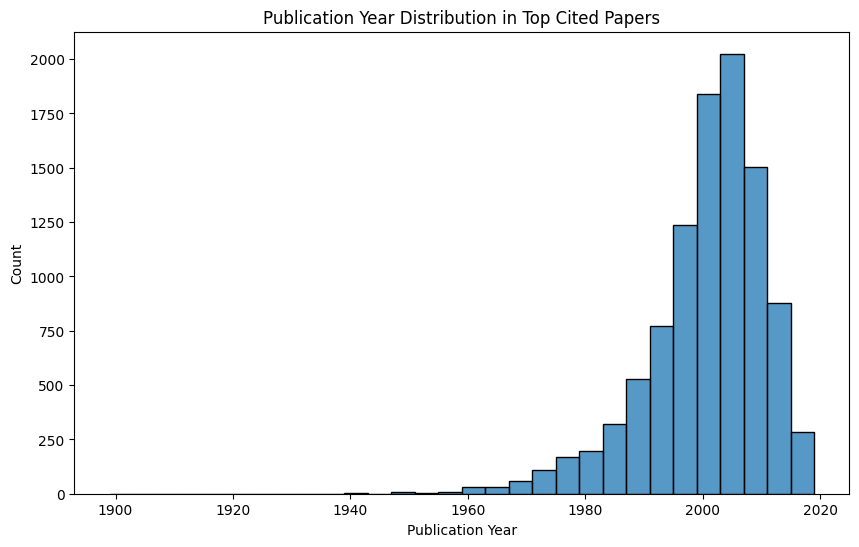

In [6]:
topics = []
for _, row in top_papers.iterrows():
    fos_str = row['fos']
    try:
        fos_list = ast.literal_eval(fos_str) if isinstance(fos_str, str) else fos_str
        topics.extend([fos['name'] for fos in fos_list if isinstance(fos, dict)])
    except:
        continue

# Example: Citation Distribution in Top Papers
plt.figure(figsize=(10, 6))
sns.histplot(top_papers['n_citation'], bins=30, kde=True)
plt.title('Citation Distribution Among Top Cited Papers')
plt.xlabel('Number of Citations')
plt.ylabel('Count')
plt.show()

# Example: Publication Year Distribution in Top Papers
plt.figure(figsize=(10, 6))
sns.histplot(top_papers['year'], bins=30, kde=False)
plt.title('Publication Year Distribution in Top Cited Papers')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.show()



In [7]:
# Citation Graph
citation_graph = nx.DiGraph()
for _, row in top_papers.iterrows():
    paper_id = row['id']
    references_str = row['references']

    # Safely evaluate the string as a list
    try:
        references = ast.literal_eval(references_str) if isinstance(references_str, str) else references_str
    except ValueError:
        # Skip if the conversion fails
        continue

    if isinstance(references, list):
        for ref in references:
            if ref in top_papers['id'].values:
                citation_graph.add_edge(paper_id, ref)


In [8]:
citation_graph
nx.write_graphml(citation_graph, "citation.graphml")

In [9]:
# Collaboration graph
collaboration_graph = nx.Graph()
for _, row in top_papers.iterrows():
    authors_str = row['authors']
    try:
        authors = ast.literal_eval(authors_str)
        # Extract a unique identifier for each author (e.g., name or ID)
        author_ids = [author.get('id') or author.get('name') for author in authors]
    except ValueError:
        author_ids = []

    for author_pair in combinations(author_ids, 2):
        if collaboration_graph.has_edge(*author_pair):
            collaboration_graph[author_pair[0]][author_pair[1]]['weight'] += 1
        else:
            collaboration_graph.add_edge(author_pair[0], author_pair[1], weight=1)


In [10]:
collaboration_graph
nx.write_graphml(collaboration_graph, "collaboration.graphml")

Example Graph from random subset

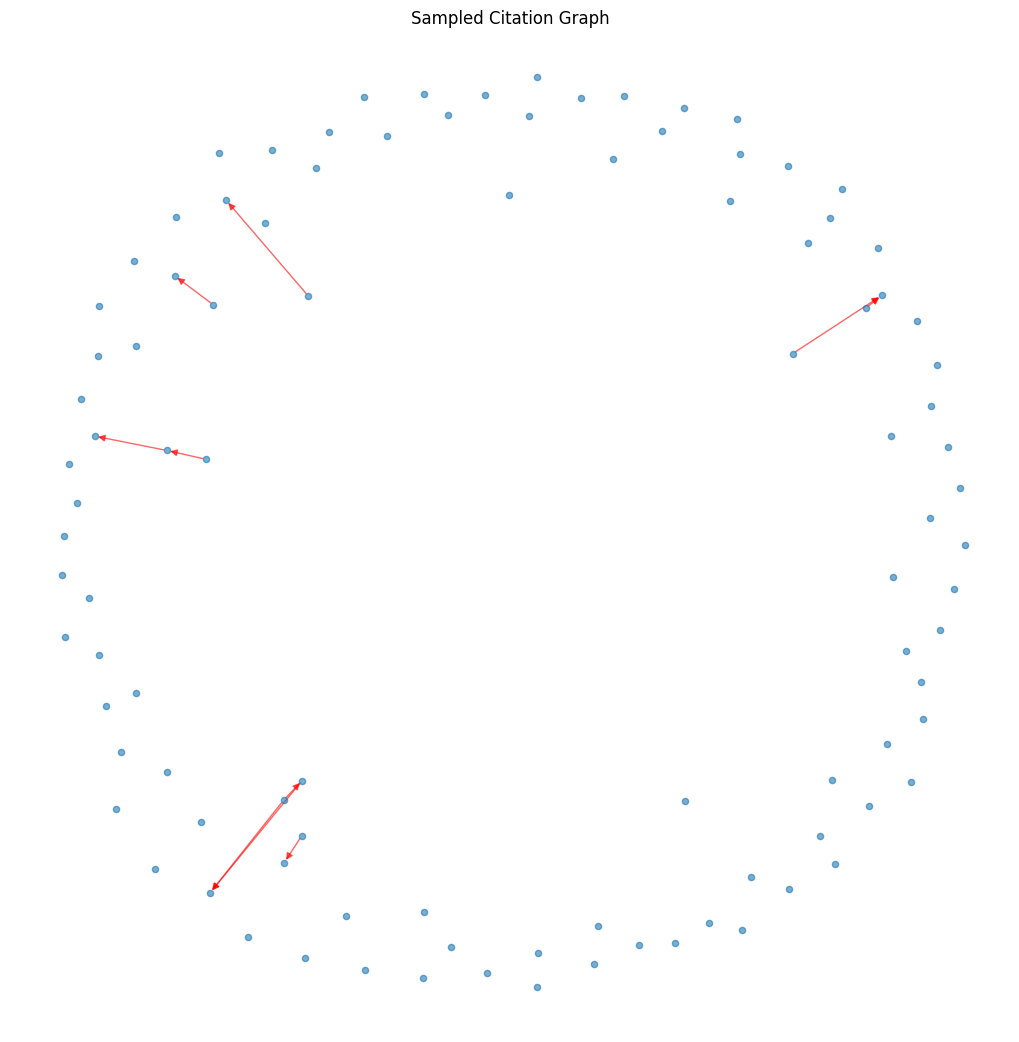

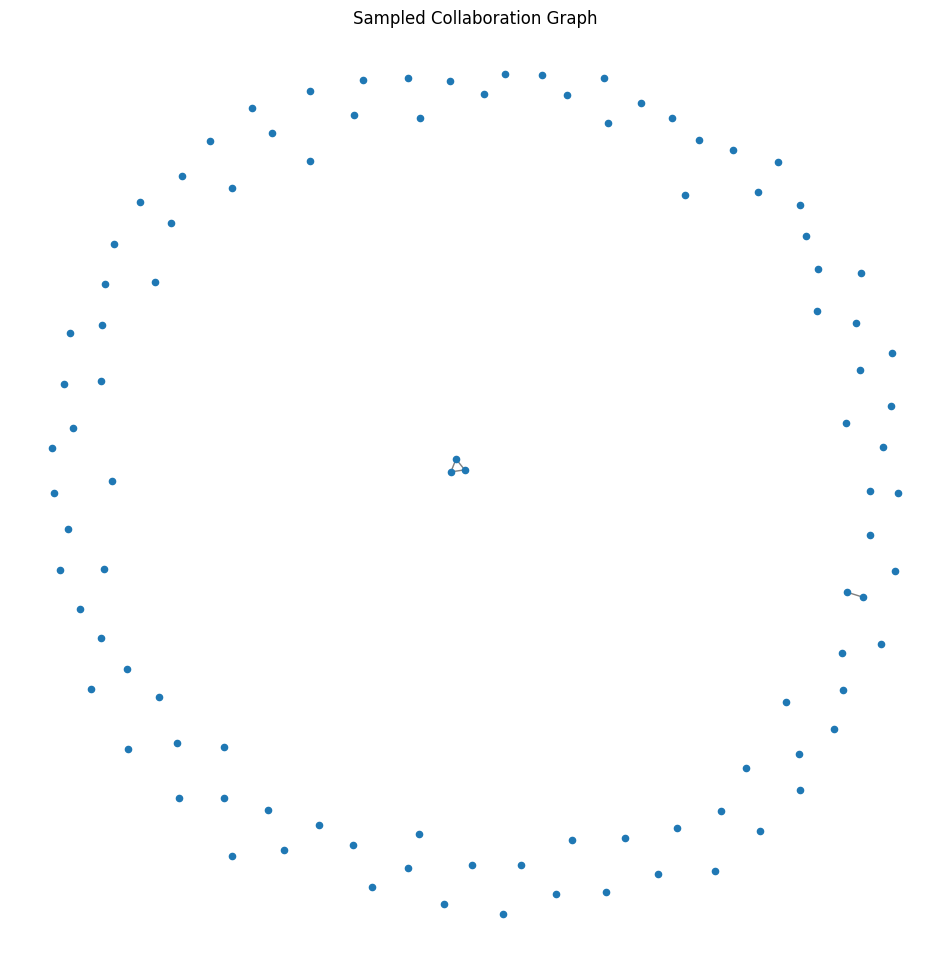

In [11]:
# Citation graph sample
sampled_nodes = random.sample(list(citation_graph.nodes()), 100)
subgraph = citation_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=20, alpha=0.6, edge_color='r')
plt.title('Sampled Citation Graph')
plt.show()


# Collaboration graph sample
sampled_nodes = random.sample(list(collaboration_graph.nodes()), 100)
subgraph = collaboration_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)  # Positions for all nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=20)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.title('Sampled Collaboration Graph')
plt.axis('off')  # Turn off the axis
plt.show()


# **2. Controlling System**

## **2.1. Backend Implementation**

## Functionality 1 - Graph's features



In [12]:
def functionality_one(graph, name):
    # Number of nodes and edges
    num_nodes = len(graph.nodes())
    num_edges = len(graph.edges())
    density = nx.density(graph)
    degrees = [deg for node, deg in graph.degree()]
    degree_distribution = np.histogram(degrees, bins=np.arange(min(degrees), max(degrees) + 1))
    average_degree = np.mean(degrees)
    percentile_95 = np.percentile(degrees, 95)
    graph_hubs = [node for node, deg in graph.degree() if deg > percentile_95]
    # Determine dense or not
    density_threshold = 0.1
    is_dense = "Dense" if density >= density_threshold else "Sparse"
    return num_nodes, num_edges, density, degree_distribution, average_degree, graph_hubs, is_dense
print (functionality_one(citation_graph, "Citation Graph"))

(9429, 52256, 0.0005878289264837225, (array([599, 679, 643, 592, 581, 609, 586, 518, 477, 419, 409, 361, 342,
       258, 241, 210, 223, 179, 162, 146, 139, 102, 115,  87,  63,  72,
        62,  47,  49,  39,  37,  26,  23,  19,  31,  18,  19,  16,  16,
        13,  12,  14,  17,   5,   4,   5,   9,  12,   7,   6,   5,   3,
         5,   6,   6,   7,   5,   3,   4,   5,   5,   1,   3,   3,   6,
         5,   2,   1,   2,   5,   1,   0,   2,   2,   1,   3,   0,   0,
         1,   2,   1,   0,   0,   0,   0,   1,   0,   0,   2,   1,   2,
         1,   2,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   1], dtype=int64), array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,

## Functionality 2 - Nodes' contribution

In [13]:
def functionality_two(graph, node, name):
    betweenness = nx.betweenness_centrality(graph)[node]
    page_rank = nx.pagerank(graph)[node]
    closeness = nx.closeness_centrality(graph)[node]
    centrality_degree = nx.degree_centrality(graph)[node]

    return graph, node, betweenness, page_rank, closeness, centrality_degree
#print (functionality_two(subgraph, 252695556, "Sample Graph"))

## Functionality 3 - Shortest ordered walk

In [14]:
def functionality_three_nx(graph, authors_a, a_1, a_n,N):
    # Get the first N nodes of the graph and work with them
    sampled_nodes = list(graph.nodes())[:N]
    subgraph_three = graph.subgraph(sampled_nodes)
    # Start with the starting node
    current_node = a_1
    # Update the path when visiting a new node
    path = [current_node]
    # Drop the first and last node from the elements to iterate over since their positions are already known
    elements_to_drop = [a_1, a_n]
    remaining_list = [x for x in authors_a if x not in elements_to_drop]
    # Iterate through the authors list
    for author in remaining_list:
        # To check if there is a feasible path or not
        try:
            # Find the shortest path from the current node to the next node in the sequence
            shortest_path = nx.shortest_path(subgraph_three, source=current_node, target=author)
            # Add it to the path
            path.extend(shortest_path[1:len(authors_a)-1])
            #print (path, a_n)
            # Update the current node
            current_node = author
            # Lastly, add the last node given to the end of the path
            path.append(a_n)
        except nx.NetworkXNoPath:
            return "There is no such path."
    return path

In [15]:
authors_list = [2874782720, 2232649233, 2559180283]
print (functionality_three_nx(collaboration_graph, authors_list, 2874782720, 2559180283, 100))

[2874782720, 2232649233, 2559180283]


## Functionality 4 - Disconnecting Graphs

In [16]:
#authorA = 2011456080
#authorB = 2030266214
def functionality_four_nx (graph, authorsA, authorsB, N):
   # Get the first N nodes of the graph and work with them
    sampled_nodes = list(graph.nodes())[:N]
    subgraph_four = graph.subgraph(sampled_nodes)
    # Create subgraphs G_a and G_b
    G_a = nx.ego_graph(graph, authorsA)
    G_b = nx.ego_graph(graph, authorsB)
    # Get the nodes
    nodes_in_G_a = set(G_a.nodes())
    nodes_in_G_b = set(G_b.nodes())
    # Get the union of G_a and G_b
    combined_nodes = nodes_in_G_a.union(nodes_in_G_b)
    # Find the minimum edge cut between G_a and G_b
    min_edge_cut = nx.minimum_edge_cut(graph.subgraph(combined_nodes), s=authorsA, t=authorsB)
    num_edges_to_disconnect = len(min_edge_cut)
    return min_edge_cut, num_edges_to_disconnect


## Functionality 5 - Extracting Communities

Create a subgraph by considering only the top N nodes (or authors) based on their degree centrality in the original graph.

In [17]:
def top_N_nodes(G, N):
    degrees = dict(G.degree())
    N_authors = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:N]
    N_authors_id = [el[0] for el in N_authors]
    subgraph = G.subgraph(N_authors_id)
    return subgraph

Identify the edge with the highest edge betweenness centrality in a given graph.

In [18]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # Extract the edge with the highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse=True):
        edge = key
        break

    return (len(edge), edge)

Apply the Girvan-Newman algorithm to detect communities in a graph by iteratively removing edges with the highest edge betweenness centrality.

In [19]:
def girvan_newman(graph):
    # Find the number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    # Continue removing edges until the graph is divided into multiple connected components
    while sg_count == 1:
        edge = edge_to_remove(graph)[1]
        graph.remove_edge(edge[0], edge[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

This function checks whether two given papers belong to the same community in a list of communities.

In [20]:
def same_community(Paper_1, Paper_2, communities):
    for community in communities:
        if Paper_1 in community and Paper_2 in community:
            return True
    return False

This function extracts communities from a graph and checks if two specified papers belong to the same community.

In [21]:
def extracting_communities(graph, Paper_1, Paper_2, N):
    if N:
        graph = top_N_nodes(graph, N)
    
    # compute number of edges    
    number_of_edges = edge_to_remove(graph)[0]

    c = girvan_newman(graph.copy())

    # find the nodes forming the communities
    communities = []

    for i in c:
        communities.append(list(i))
    
    same_c = same_community(Paper_1, Paper_2, communities)
    
    return (number_of_edges, communities, same_c)

## **2.2. Frontend Implementation**

### Visualization 1 - Visualize graph features

**1) A table containing the following general information about the graph:**

In [ ]:
import seaborn as sns
from tabulate import tabulate

**CITATION GRAPH**

In [ ]:
citation_nodes, citation_edges, citation_density, citation_degree_distr, citation_average_degree, citation_hubs, citation_dense_or_sparse= functionality_one(citation_graph, "Citation Graph")

In [ ]:
table_citation = [['Number of nodes in the Graph', citation_nodes],
           ['Number of edges in the Graph', citation_edges],
           ['Density of the Graph', citation_density],
           ['Average degree of the Graph', citation_average_degree],
           ['Graph density status', citation_dense_or_sparse]]
print(tabulate(table_citation, tablefmt='grid', numalign="right"))

+------------------------------+-----------------------+
| Number of nodes in the Graph | 8131                  |
+------------------------------+-----------------------+
| Number of edges in the Graph | 29841                 |
+------------------------------+-----------------------+
| Density of the Graph         | 0.0004514179934567763 |
+------------------------------+-----------------------+
| Average degree of the Graph  | 7.340056573607183     |
+------------------------------+-----------------------+
| Graph density status         | Sparse                |
+------------------------------+-----------------------+


**COLLABORATION GRAPH**

In [ ]:
collaboration_nodes, collaboration_edges, collaboration_density, collaboration_degree_distr, collaboration_average_degree, collaboration_hubs, collaboration_dense_or_sparse = functionality_one(collaboration_graph, "Collaboration Graph")

In [54]:
table_collaboration = [['Number of nodes in the Graph', collaboration_nodes],
           ['Number of edges in the Graph', collaboration_edges],
           ['Density of the Graph', collaboration_density],
           ['Average degree of the Graph', collaboration_average_degree],
           ['The Graph is', collaboration_dense_or_sparse]]
print(tabulate(table_collaboration, tablefmt='grid', numalign="right"))

+------------------------------+-----------------------+
| Number of nodes in the Graph | 20004                 |
+------------------------------+-----------------------+
| Number of edges in the Graph | 136047                |
+------------------------------+-----------------------+
| Density of the Graph         | 0.0006799969806568607 |
+------------------------------+-----------------------+
| Average degree of the Graph  | 13.601979604079185    |
+------------------------------+-----------------------+
| The Graph is                 | Sparse                |
+------------------------------+-----------------------+


**2) A table that lists the graph's hubs**

**CITATION GRAPH**

In [56]:
table_citation_hubs = list(citation_hubs)
tab_citation_hubs = [[i, table_citation_hubs[i]] for i in range(len(table_citation_hubs))][:21]
print(tabulate(tab_citation_hubs, tablefmt='github', headers=["ID", "Citation Graph's hubs"]))

|   ID |   Citation Graph's hubs |
|------|-------------------------|
|    0 |              2024668293 |
|    1 |              2109863423 |
|    2 |              2111308925 |
|    3 |              2154422044 |
|    4 |              2427881153 |
|    5 |              2152761983 |
|    6 |              2153635508 |
|    7 |              1791587663 |
|    8 |              2127455238 |
|    9 |              2140066605 |
|   10 |              1608462934 |
|   11 |              1992825118 |
|   12 |              2152473410 |
|   13 |              2172188317 |
|   14 |              2177274842 |
|   15 |              1880262756 |
|   16 |              1516111018 |
|   17 |              2107743791 |
|   18 |              2147152072 |
|   19 |              2037227137 |
|   20 |              2102605133 |


**COLLABORATION GRAPH**

In [57]:
table_collaboration_hubs = list(collaboration_hubs)
tab_collaboration_hubs = [[i, table_collaboration_hubs[i]] for i in range(len(table_collaboration_hubs))][:21]
print(tabulate(tab_collaboration_hubs, tablefmt='github', headers=["ID", "Collaboration Graph's hubs"]))

|   ID |   Collaboration Graph's hubs |
|------|------------------------------|
|    0 |                   1445484688 |
|    1 |                   2104401652 |
|    2 |                   2007415138 |
|    3 |                   2096217197 |
|    4 |                   2146468246 |
|    5 |                    215131072 |
|    6 |                   2429370538 |
|    7 |                   2575315241 |
|    8 |                   1822555116 |
|    9 |                    161269817 |
|   10 |                   2328522601 |
|   11 |                   2304583711 |
|   12 |                   1993363060 |
|   13 |                   2079517616 |
|   14 |                   2230831812 |
|   15 |                   2147318212 |
|   16 |                   2120643991 |
|   17 |                   2141862317 |
|   18 |                   1998464616 |
|   19 |                   2098984663 |
|   20 |                   2102002796 |


**3) A plot depicting the distribution of the citations received by papers (Citation graph)**

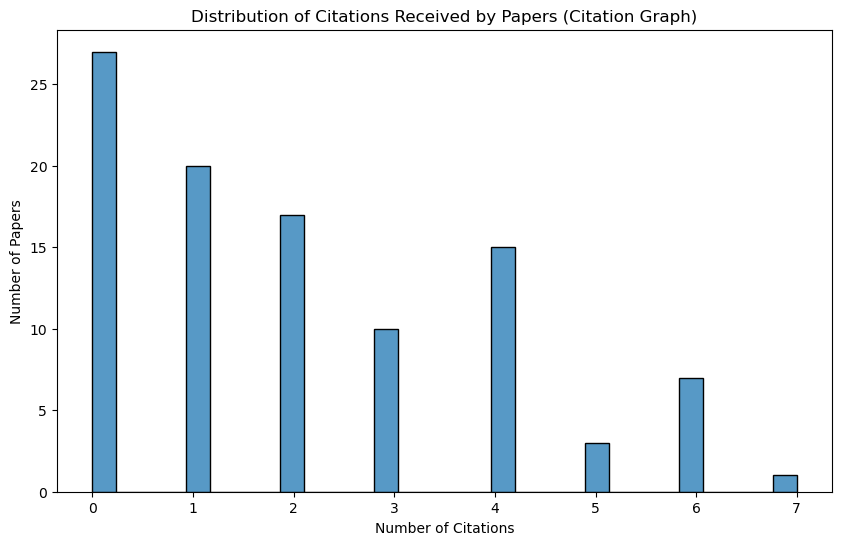

In [58]:
N = 100
degree_centrality_citation = nx.degree_centrality(citation_graph)
top_N_nodes_citation = sorted(degree_centrality_citation, key=degree_centrality_citation.get, reverse=True)[:N]
G_top_N_citation = citation_graph.subgraph(top_N_nodes_citation)
citation_counts_citation = [d for n, d in G_top_N_citation.in_degree()]

plt.figure(figsize=(10, 6))
sns.histplot(citation_counts_citation, bins=30, kde=False)
plt.title('Distribution of Citations Received by Papers (Citation Graph)')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Papers')
plt.show()

**4) A plot depicting the distribution of the given citations by papers (Citation graph)**

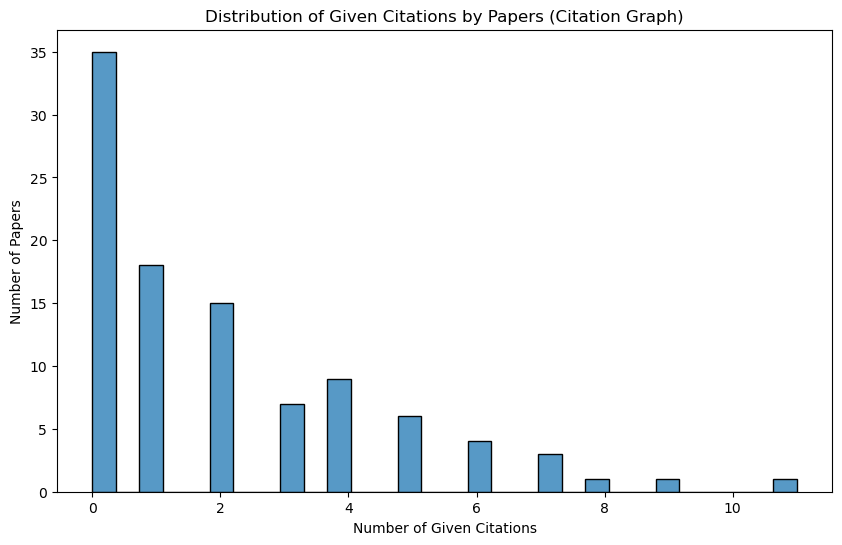

In [59]:
N = 100
degree_centrality_given_citation = nx.degree_centrality(citation_graph)
top_N_nodes_given_citation = sorted(degree_centrality_given_citation, key=degree_centrality_given_citation.get, reverse=True)[:N]
G_top_N_given_citation = citation_graph.subgraph(top_N_nodes_given_citation)
given_citation_counts_citation = [d for n, d in G_top_N_given_citation.out_degree()]

plt.figure(figsize=(10, 6))
sns.histplot(given_citation_counts_citation, bins=30, kde=False)
plt.title('Distribution of Given Citations by Papers (Citation Graph)')
plt.xlabel('Number of Given Citations')
plt.ylabel('Number of Papers')
plt.show()

**5) A plot depicting the number of collaborations of the author (Collaboration graph)**

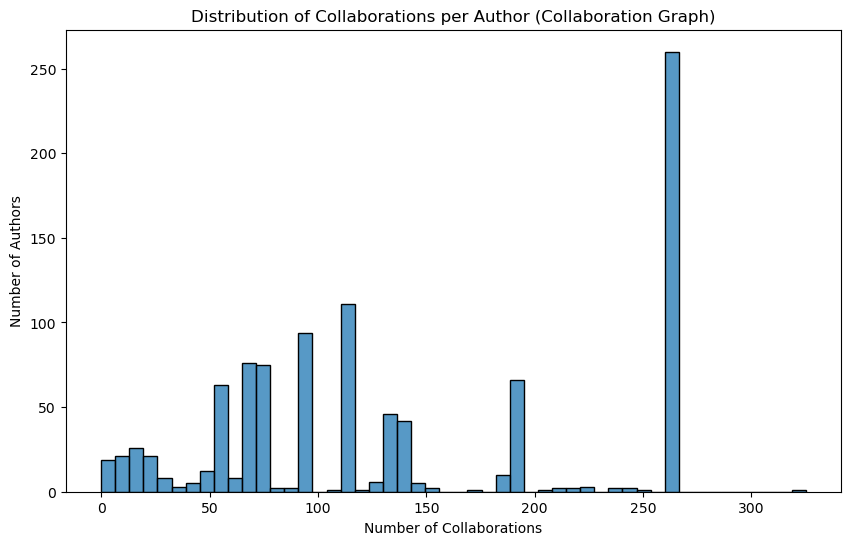

In [62]:
collaboration_nodes, collaboration_edges, collaboration_density, collaboration_degree_distr, collaboration_average_degree, collaboration_hubs, collaboration_dense_or_sparse = functionality_one(collaboration_graph, 'Collaboration graph')

N = 1000
degree_centrality_collaboration = nx.degree_centrality(collaboration_graph)
top_N_nodes_collaboration = sorted(degree_centrality_collaboration, key=degree_centrality_collaboration.get, reverse=True)[:N]
G_top_N_collaboration = collaboration_graph.subgraph(top_N_nodes_collaboration)
collaboration_counts_collaboration = [d for n, d in G_top_N_collaboration.degree()]

plt.figure(figsize=(10, 6))
sns.histplot(collaboration_counts_collaboration, bins=50, kde=False)
plt.title('Distribution of Collaborations per Author (Collaboration Graph)')
plt.xlabel('Number of Collaborations')
plt.ylabel('Number of Authors')
plt.show()

### Visualization 2 - Visualize node's contribution

**CITATION GRAPH**

In [64]:
sub_cit = citation_graph.subgraph(list(citation_graph.nodes())[:100])
graph, node, a_betweeness_centr, a_pagerank_centr, a_closeness_centr, a_degree_centr = functionality_two(sub_cit, 2132984323, 'Citation_graph')

In [65]:
table_a = [['Name of Graph', graph],
           ['Node', node],
           ['Betweeness', a_betweeness_centr],
           ['PageRank', a_pagerank_centr],
           ['ClosenessCentrality', a_closeness_centr],
           ['DegreeCentrality', a_degree_centr]]
print(tabulate(table_a, tablefmt='grid', numalign="right"))

+---------------------+--------------------------------------+
| Name of Graph       | DiGraph with 100 nodes and 188 edges |
+---------------------+--------------------------------------+
| Node                | 2132984323                           |
+---------------------+--------------------------------------+
| Betweeness          | 0.0022675736961451248                |
+---------------------+--------------------------------------+
| PageRank            | 0.018729478931555455                 |
+---------------------+--------------------------------------+
| ClosenessCentrality | 0.04949494949494949                  |
+---------------------+--------------------------------------+
| DegreeCentrality    | 0.08080808080808081                  |
+---------------------+--------------------------------------+


**COLLABORATION GRAPH**

In [66]:
sub_collab = collaboration_graph.subgraph(list(collaboration_graph.nodes())[:1000])
graph, nodes ,b_betweeness_centr, b_pagerank_centr, b_closeness_centr, b_degree_centr = functionality_two(sub_collab,1975899429,'Collaboration_graph')

In [67]:
table_b = [['Name of Graph', graph],
           ['Node', node],
           ['Betweeness', b_betweeness_centr],
           ['PageRank', b_pagerank_centr],
           ['ClosenessCentrality', b_closeness_centr],
           ['DegreeCentrality', b_degree_centr]]
print(tabulate(table_b, tablefmt='grid', numalign="right"))

+---------------------+--------------------------------------+
| Name of Graph       | Graph with 1000 nodes and 2781 edges |
+---------------------+--------------------------------------+
| Node                | 2132984323                           |
+---------------------+--------------------------------------+
| Betweeness          | 0.0                                  |
+---------------------+--------------------------------------+
| PageRank            | 0.0013374689826302717                |
+---------------------+--------------------------------------+
| ClosenessCentrality | 0.003003003003003003                 |
+---------------------+--------------------------------------+
| DegreeCentrality    | 0.003003003003003003                 |
+---------------------+--------------------------------------+


### Visualization 3 - Visualize the shortest-ordered route

In [68]:
def print_papers(shortest_walk):
    if isinstance(shortest_walk, list):
        print("Papers to be crossed in the shortest walk:")
        for i in range(len(shortest_walk) - 1):
            print(f"Edge {i + 1}: Paper between {shortest_walk[i]} and {shortest_walk[i + 1]}")
    else:
        print(shortest_walk)

def plot_graph(graph, shortest_walk):
    pos = nx.spring_layout(graph)
    labels = {(u, v): i+1 for i, (u, v) in enumerate(zip(shortest_walk[:-1], shortest_walk[1:]))}
    
    nx.draw(graph, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    
    plt.title("Graph with Shortest Walk")
    plt.show()

Papers to be crossed in the shortest walk:
Edge 1: Paper between 2874782720 and 2232649233
Edge 2: Paper between 2232649233 and 2559180283


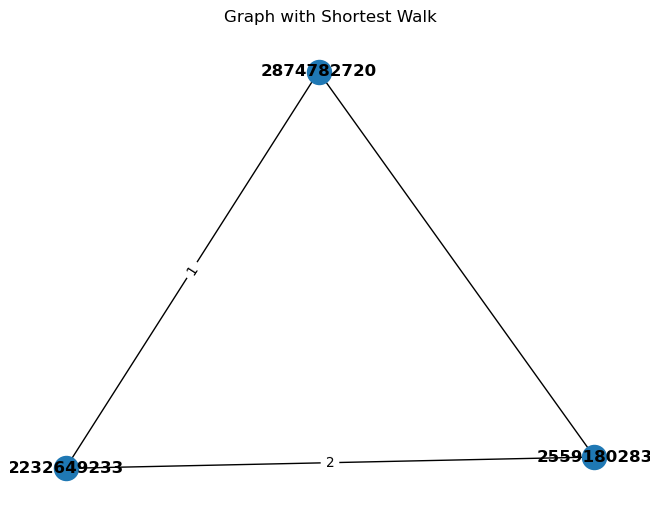

In [70]:
authors_list = [2874782720, 2232649233, 2559180283]

# Create a sample graph for testing
graph = nx.complete_graph(authors_list)

# Use the provided function
shortest_walk = functionality_three_nx(collaboration_graph, authors_list, 2874782720, 2559180283, 100)

# Print the papers to be crossed
print_papers(shortest_walk)

# Plot the graph with identified edges in the shortest walk
plot_graph(graph, shortest_walk)

### Visualization 4 - Visualize the disconnected graph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_functionality_four(graph, authorsA, authorsB, N):
    # Get the results from functionality_four_nx
    min_edge_cut, num_edges_to_disconnect = functionality_four_nx(graph, authorsA, authorsB, N)

    # Print the number of links to be disconnected
    print(f"Number of links to be disconnected: {num_edges_to_disconnect}")

    # Plot the original graph
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    nx.draw(graph, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800)
    plt.title("Original Graph")

    # Plot the graph after removing the links and identify the two nodes
    plt.subplot(122)
    updated_graph = graph.copy()
    updated_graph.remove_edges_from(min_edge_cut)
    nx.draw(updated_graph, with_labels=True, font_weight='bold', node_color='lightcoral', node_size=800)
    plt.title("Graph After Removing Links")

    # Highlight the two nodes in the updated graph
    plt.scatter(*zip(*graph.nodes[authorsA]['pos']), color='blue', s=100, label='Authors A')
    plt.scatter(*zip(*graph.nodes[authorsB]['pos']), color='red', s=100, label='Authors B')

    plt.legend()
    plt.show()


visualize_functionality_four(collaboration_graph, 2011456080, 2030266214, 100)

### Visualization 5 - Visualize the communities

* Print the number of links that should be removed to have the communities
* A table depicting the communities and the papers that belong to each community
* Plot the original graph
* Plot the graph showing the communities in the network
* Plot the final graph and identify the community/communities of Paper_1 and Paper_2

In [73]:
number_of_edges, communities, same_c = extracting_communities(collaboration_graph, 1973035492, 2120643991, 20)

In [74]:
extracting_communities(collaboration_graph, 1973035492, 2120643991, 20)

(2,
 [[1566488673,
   1973035492,
   2130160582,
   1976452423,
   2502209291,
   2114532620,
   338444495,
   2034164144,
   783371218,
   1978529654,
   2126370775,
   1524700667,
   1984280187,
   2240988444],
  [332422508, 173839695, 2065847026, 2146468246, 2120643991, 2111642879]],
 False)

1) Print the number of links that should be removed to have the communities

In [98]:
print(f"Number of links to be removed: {number_of_edges}")

Number of links to be removed: 2


2) A table depicting the communities and the papers that belong to each community

In [99]:
def print_community_table(communities):
    print("Community\tPapers")
    for i, community in enumerate(communities):
        paper_str = ', '.join(str(paper) for paper in community)
        print(f"{i + 1}\t\t{paper_str}")

In [100]:
print_community_table(communities)

Community	Papers
1		1566488673, 1973035492, 2130160582, 1976452423, 2502209291, 2114532620, 338444495, 2034164144, 783371218, 1978529654, 2126370775, 1524700667, 1984280187, 2240988444
2		332422508, 173839695, 2065847026, 2146468246, 2120643991, 2111642879


3) Plot the original graph

In [101]:
def plot_original_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph)
    nx.draw(top_N_nodes(collaboration_graph, N=20), pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray')
    plt.title('Original Graph')
    plt.show()

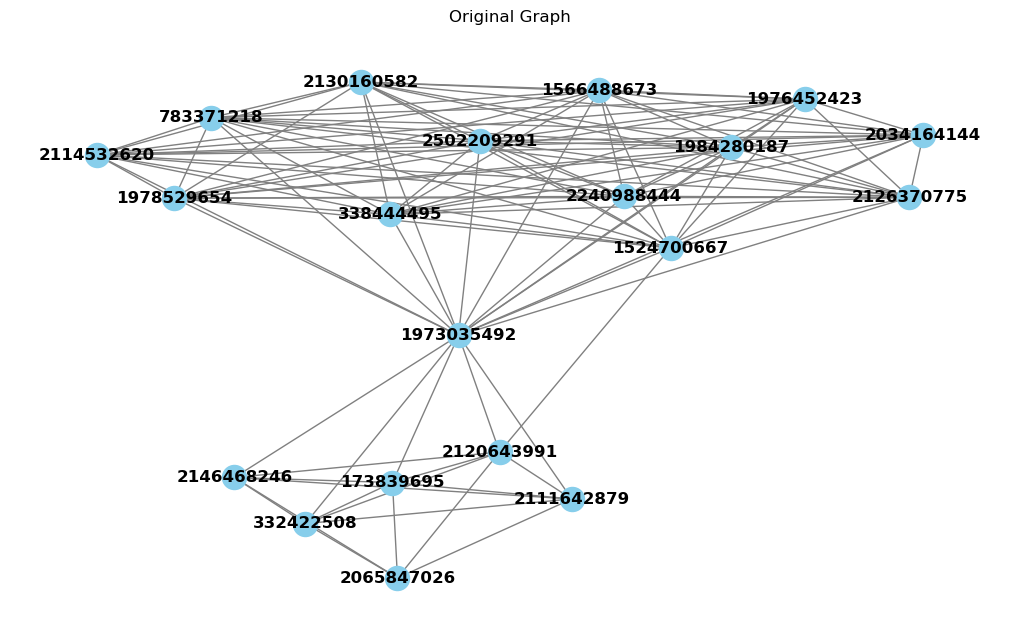

In [102]:
plot_original_graph(top_N_nodes(collaboration_graph, N=20))

In [80]:
communities

[[1566488673,
  1973035492,
  2130160582,
  1976452423,
  2502209291,
  2114532620,
  338444495,
  2034164144,
  783371218,
  1978529654,
  2126370775,
  1524700667,
  1984280187,
  2240988444],
 [332422508, 173839695, 2065847026, 2146468246, 2120643991, 2111642879]]

4) Plot the graph showing the communities in the network

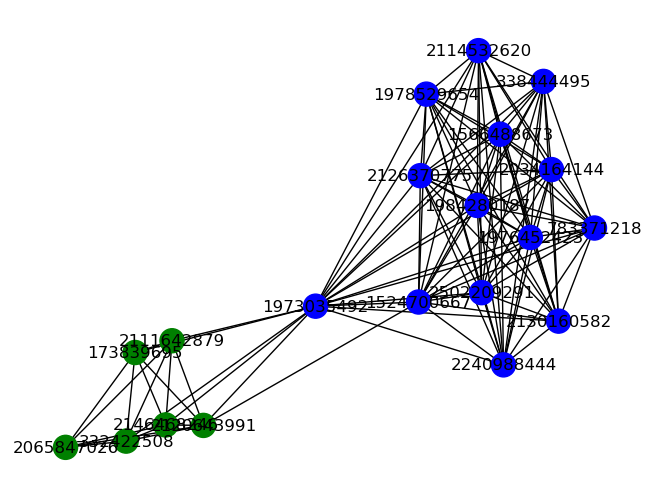

In [81]:
# Plot the communities
node_groups = communities
color_map = []
for node in top_N_nodes(collaboration_graph, N=20):
    in_community = False
    for idx, community in enumerate(node_groups):
        if node in community:
            in_community = True
            # Assign two different colors based on the community index
            color_map.append('blue' if idx == 0 else 'green')
            break

    if not in_community:
        color_map.append('gray')  # Default color for nodes not in communities

nx.draw(top_N_nodes(collaboration_graph, N=20), node_color=color_map, with_labels=True)
plt.show()

5) Plot the final graph and identify the community/communities of Paper_1 and Paper_2

In [82]:
def plot_final_graph_with_communities(graph, Paper_1, Paper_2, N):

    # Assign colors to nodes based on Paper_1, Paper_2, or other communities
    node_colors = []
    for node in graph.nodes():
        if node == Paper_1:
            node_colors.append('red')
        elif node == Paper_2:
            node_colors.append('blue')
        else:
            in_community = False
            for idx, community in enumerate(communities):
                if node in community:
                    in_community = True
                    # Assign a unique color for each community
                    node_colors.append(f'C{idx}')
                    break
            if not in_community:
                node_colors.append('gray')  # Default color for nodes not in communities

    # Plot the final graph with communities
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, node_color=node_colors, with_labels=True, font_weight='bold', edge_color='gray')
    
    # Highlight Paper_1 and Paper_2 with different markers
    nx.draw_networkx_nodes(graph, pos, nodelist=[Paper_1, Paper_2], node_color=['red', 'blue'], node_size=300, node_shape='o')

    plt.title('Final Graph with Communities')
    plt.show()


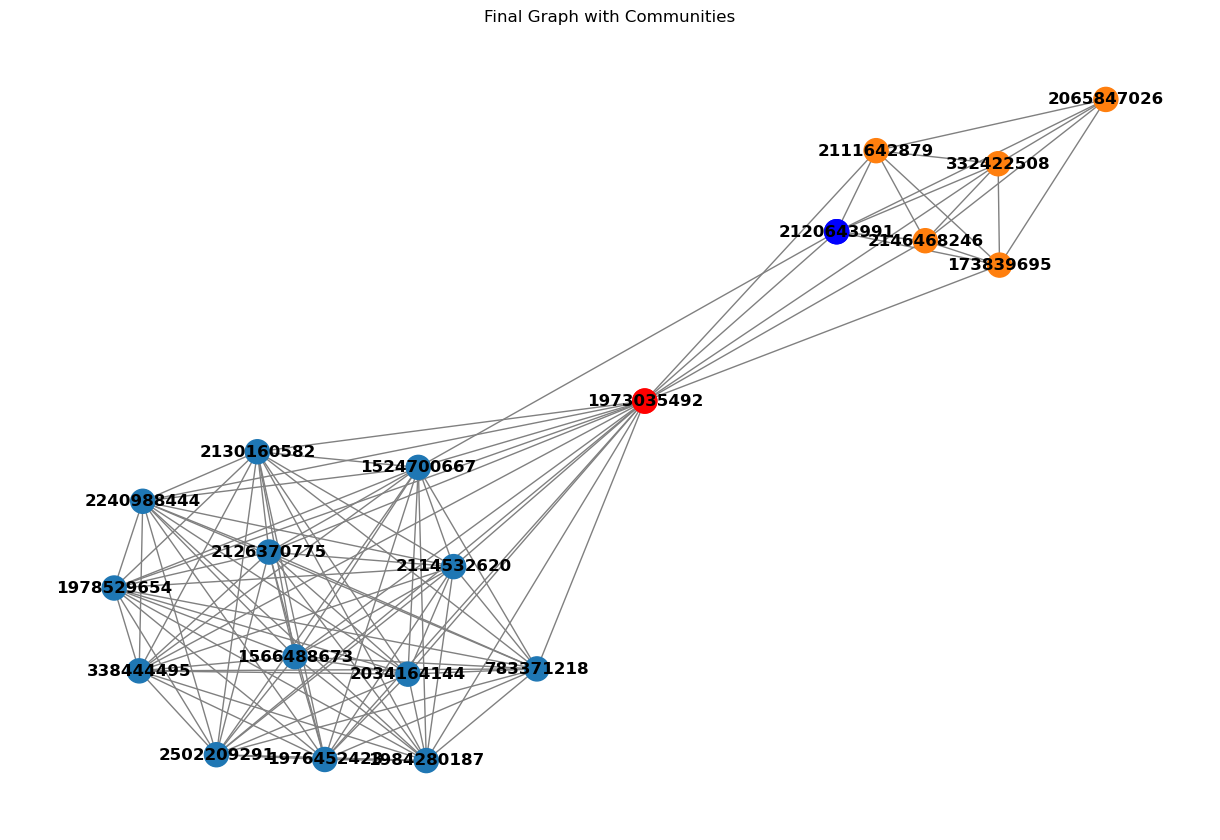

In [83]:
plot_final_graph_with_communities(top_N_nodes(collaboration_graph, N=20), 1973035492, 2120643991, N)

# **3. Bonus - PageRank on MapReduce**

# **4. Command Line Question**

Before moving to the command line, edges and betweenness centrality information of the citation graph are exportes as csv files.

In [ ]:
edges = citation_graph.edges()
edges_output_file = '/content/citation_graph_edges.csv'
with open(edges_output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for edge in edges:
        writer.writerow([edge])


In [ ]:
betweenness_trial = nx.betweenness_centrality(citation_graph)
output_file = '/content/betweenness_centrality.csv'
with open(output_file, 'w') as csvfile:
    for node, centrality in betweenness_trial.items():
        csvfile.write(f'{node},{centrality}\n')

The outputs are as follows:

# **5. Algorithmic Question**

## **1. Implement an algorithm to solve the described mentioned problem.**
I found a small discrepancy regarding example 2. In fact, from my algorithm and also from the calculations carried out by hand the result of the second input is 403 instead of 399.


In [ ]:
def max_global_score(N, M, S, skills_required, athletes):
    # Function to calculate the maximum global score based on given parameters

    skillsBestValues = []  # List to store the best values for each skill
    totale = 0  # Variable to store the total score
    bestAbility = 0  # Variable to store the best ability for each skill

    # Loop through each skill required
    for skill in skills_required:
        # Loop through each athlete
        for k, v in athletes.items():
            # Loop through each skill and score of the athlete
            for t in v:
                # Check if the athlete has the required skill
                if t[0] == skill:
                    valoreAtleta = t[1]  # Get the score for the skill
                    skillsBestValues.append(valoreAtleta)  # Add the score to the list

        # Check if there are any scores for the current skill
        if skillsBestValues != []:
            bestAbility = max(skillsBestValues)  # Find the maximum score for the skill

        totale += bestAbility  # Add the best ability to the total score
        skillsBestValues.clear()  # Clear the list for the next skill

        # Remove the athlete with the best ability for the current skill
        for k, v in athletes.items():
            for t in v:
                if t[0] == skill and bestAbility == t[1]:
                    athletes[k].remove(t)

        bestAbility = 0  # Reset the best ability for the next iteration

    print(totale)  # Print the total score
    return totale  # Return the total score


# Input N, M, S values
N, M, S = map(int, input().split())
# Input the list of skills required
skills_required = input().split()

# Initialize a dictionary to store athletes and their abilities
athletes = {}

# Input athlete information
for _ in range(N):
    athlete_id = int(input())
    athletes_abilities = []
    for _ in range(S):
        skill, score = input().split()
        athletes_abilities.append((skill, int(score)))
    athletes[athlete_id] = athletes_abilities

# Call the function to calculate the result
result = max_global_score(N, M, S, skills_required, athletes)

## **2. What is the time complexity (the Big O notation) of your solution? Please provide a detailed explanation of how you calculated the time complexity.**
The outer loop iterates over each skill required (for skill in skills_required). Inside this loop, there are two nested loops that iterate over each athlete's skills (for k, v in athletes.items() and for t in v). These nested loops are responsible for finding the maximum score for each skill.

For each skill, there are two nested loops. The innermost loop iterates over the skills of a specific athlete. In the worst case, it may iterate over all the skills (S). Therefore, the time complexity for finding the maximum score for a skill is O(S).

The outer loop runs for each skill (M times). Therefore, the overall time complexity is O(M * S).

Additionally, the code contains operations like appending, clearing a list (skillsBestValues.clear()), and removing elements from the athletes' list. These operations are typically O(1) on average. However, since they are within the nested loops, we need to consider their impact on the overall time complexity.

In conclusion, the time complexity of the provided code is O(M * S), where M is the number of skills required, and S is the maximum number of skills an athlete may have.

## **3. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. If the two differ, which one is right? (why?)**
The time complexity of the code provided is O(M * S), where M is the number of skills required and S is the maximum number of skills an athlete can have. This result is consistent with both manual analysis and could be obtained from automatic tools. The two complexities agree.

## **4. If you algorithm has exponential time complexity, can you provide a polynomial-time version?**
Looking at the code I wrote, the time complexity is not exponential, but it's not as efficient as it could be. In the worst case, it's quadratic - O(S^2 * N), where S is the number of skills and N is the number of athletes. I used nested loops: one for skills, one for athletes, and another for athlete skills. This leads to a lot of iterations, especially when removing skills with the highest values for each athlete. To improve efficiency, I could consider using data structures like dictionaries or sets for faster skill lookup and removal operations. Also, rethinking the algorithm to avoid unnecessary iterations might help in reducing the time complexity.

In summary, while the current implementation works, it might not be the most optimal for larger inputs, and there's room for improvement in terms of time complexity.


## **5. If S=1, how does the time complexity of an optimal algorithm to solve this problem change?**
If S = 1, meaning there is only one skill required, the time complexity of the algorithm can be improved significantly. In this case, the nested loops over skills become a single loop, as there is only one skill to iterate over. The second inner loop, which iterates over athlete skills, is eliminated as well.

With S = 1, the time complexity becomes O(N), where N is the number of athletes. This is a linear time complexity, and the algorithm becomes more efficient because it no longer depends on the number of skills. The overall performance improves when there is a single skill required, and the algorithm becomes more scalable for larger inputs.